# IMPORTING IBRARIES

In [82]:
import numpy as np
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# LOADING DATA

In [83]:
# Load the data into a pandas DataFrame
data = pd.read_excel('abtesting_1.xlsx')

# INSPECTING DATA

SUBJECT LINE A="GET 20% OFF YOUR FIRST PURCHASE!"

SUBJECT LINE B="NEW CUSTOMER OFFER: 20% DISCOUNT CODE INSIDE"

In [84]:
data

,Subject Line,Open Rate,Email Group
0,A,0.12,Group A
1,A,0.13,Group A
2,A,0.15,Group A
3,A,0.16,Group A
4,A,0.14,Group A
5,A,0.18,Group A
6,A,0.19,Group A
7,A,0.17,Group A
8,A,0.16,Group A
9,A,0.20,Group A


In [85]:
data.head(1)

,Subject Line,Open Rate,Email Group
0,A,0.12,Group A


In [86]:
data.tail(1)

,Subject Line,Open Rate,Email Group
39,B,0.3,Group A


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subject Line  40 non-null     object 
 1   Open Rate     40 non-null     float64
 2   Email Group   40 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [88]:
# Check for null values
null_values = data.isnull().sum()

# Print the number of null values for each column
print(null_values)

Subject Line    0
Open Rate       0
Email Group     0
dtype: int64


# DATA ANALYSING

In [89]:
# Calculate the average open rate for each subject line
subject_line_a = data[data['Subject Line'] == 'A']['Open Rate']
subject_line_b = data[data['Subject Line'] == 'B']['Open Rate']
average_open_rate_a = np.mean(subject_line_a)
average_open_rate_b = np.mean(subject_line_b)

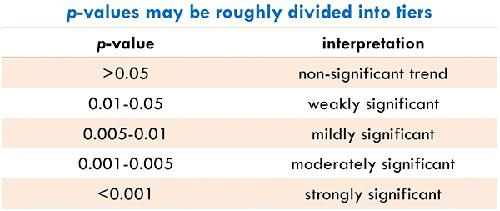

In [90]:
# Perform the two-sample t-test
t_value, p_value = stats.ttest_ind(subject_line_a, subject_line_b)

In [91]:
# Print the results
print("Subject Line A Average Open Rate: {:.2f}%".format(average_open_rate_a * 100))
print("Subject Line B Average Open Rate: {:.2f}%".format(average_open_rate_b * 100))
print("t-value: {:.2f}".format(t_value))
print("p-value: {:.4f}".format(p_value))

Subject Line A Average Open Rate: 15.75%
Subject Line B Average Open Rate: 21.50%
t-value: -4.47
p-value: 0.0001


In [92]:
# Check if the p-value is less than 0.05 (significance level)
if p_value < 0.05:
    print("There is a statistically significant difference in the open rates between the two subject lines.")
    if average_open_rate_a < average_open_rate_b:
        print("Subject Line B is more effective.")
    else:
        print("Subject Line A is more effective.")
else:
    print("There is no statistically significant difference in the open rates between the two subject lines.")

There is a statistically significant difference in the open rates between the two subject lines.
Subject Line B is more effective.


# VISUALIZATION

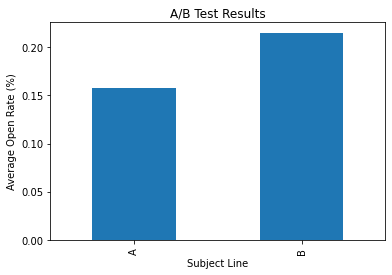

In [93]:
df = pd.DataFrame(data)

# Create the bar plot
grouped = df.groupby('Subject Line')['Open Rate'].mean()
grouped.plot(kind='bar')
plt.xlabel('Subject Line')
plt.ylabel('Average Open Rate (%)')
plt.title('A/B Test Results')
plt.show()

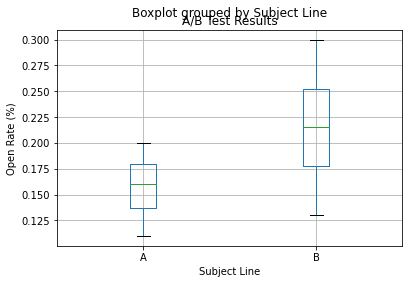

In [94]:
# Create the box plot
df.boxplot(column='Open Rate', by='Subject Line')
plt.xlabel('Subject Line')
plt.ylabel('Open Rate (%)')
plt.title('A/B Test Results')
plt.show()